In [51]:
import csv
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
keys = ['Now that you have been placed in a house, what is your ranking of the Harvard houses? [1st]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [2nd]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [3rd]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [4th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [5th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [6th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [7th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [8th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [9th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [10th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [11th]',
       'Now that you have been placed in a house, what is your ranking of the Harvard houses? [12th]']

df23 = pd.read_csv('housing_prefs23.csv')[keys]

houses = ['Lowell',
          'Winthrop',
          'Adams',
          'Quincy',
          'Dunster',
          'Eliot',
          'Leverett',
          'Mather',
          'Kirkland',
          'Currier',
          'Pforzheimer',
          'Cabot']
indices = np.arange(1, 12, 1)

rank_count = pd.DataFrame(columns=indices,
                          index=houses)

for (key, index) in zip(keys, indices):
    rank_count[index] = df23[key].value_counts()

avgs = []
for i in houses:
    avgs.append(np.dot(rank_count.T[i], indices)/np.sum(rank_count.T[i]))

rank_count["avgs"] = avgs
rank_count = rank_count.sort_values("avgs")

rank_count

,1,2,3,4,5,6,7,8,9,10,11,avgs
Lowell,110,100,61,50,35,12,15,8,5,2,4,3.029851
Winthrop,60,97,75,52,43,39,16,5,7,6,2,3.564677
Adams,65,60,51,64,41,37,32,19,13,8,8,4.226131
Dunster,34,61,69,69,53,41,32,21,10,8,2,4.335000
Quincy,48,27,57,57,67,51,35,32,14,8,5,4.748130
Leverett,10,9,18,36,44,76,84,59,33,13,11,6.386768
Eliot,14,13,25,30,57,53,61,67,31,22,22,6.435443
Mather,30,11,17,13,29,42,50,62,75,26,22,6.830239
Kirkland,6,1,8,7,16,27,36,65,104,41,40,8.148148
Currier,12,10,13,8,11,8,17,28,34,85,115,8.709677


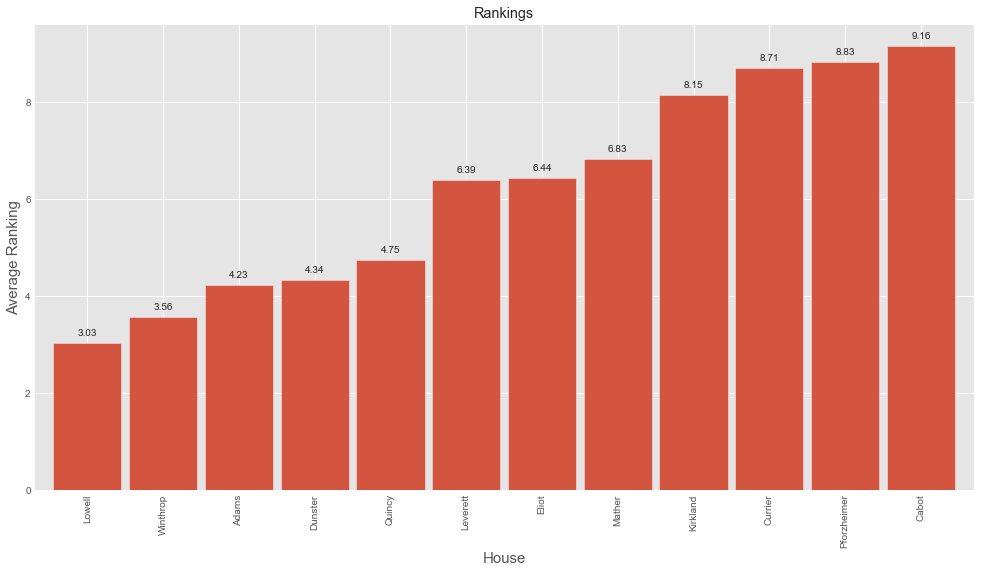

In [66]:
ax = rank_count["avgs"].plot(kind='bar', title='Rankings', color="#d3553f", fontsize=10, width=0.9, figsize=(15,8))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
ax.set_xlabel("House", fontsize=15)
ax.set_ylabel("Average Ranking", fontsize=15)
matplotlib.style.use('ggplot') 

In [67]:
ax.get_figure().savefig('rankings.png')